In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from scipy.misc import toimage
import pandas as pd
%matplotlib inline

In [2]:
s1 = np.asarray([0,0,1])
r = 28
n = np.linalg.norm(s1) 

In [3]:
source = [[0.8389,0.7193,1],[0.5773,0.6363,1],[0.3638,0.5865,1],[0.1763,0.5596,1],[-.1763,-0.5596,1],[-0.3638,-0.5865,1],[-0.5773,-0.6363,1],[-0.8389,-0.7193,1]]
source = np.asarray(source)
r = 28
norm = np.linalg.norm(source,axis=1)
norm = np.reshape(norm,(len(norm),1))

In [4]:
img_size = 64
x_range = np.arange(-32,32,1)
y_range = np.arange(32,-32,-1)
xx,yy = np.meshgrid(x_range,y_range)

tmp1 = (r**2-(xx**2+yy**2))

true_p = np.zeros((tmp1.shape))
true_q = np.zeros((tmp1.shape))
true_p[tmp1>0] = xx[tmp1>0]/((tmp1[tmp1>0])**0.5)
true_p[tmp1<0] = 0
true_q[tmp1>0] = yy[tmp1>0]/((tmp1[tmp1>0])**0.5)
true_q[tmp1<0] = 0

In [5]:
z = np.zeros((8,img_size,img_size))
tmp = r**2 - (xx**2 + yy**2)
tmp[tmp>0] = (tmp[tmp>0])**0.5

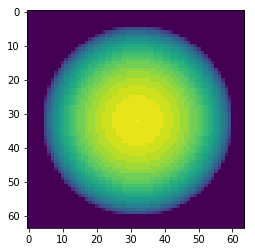

In [6]:
plt.figure(figsize=(12,12))
f1 = np.zeros((img_size,img_size))
f1[tmp>0] = (xx[tmp>0]*s1[0] + yy[tmp>0]*s1[1] + tmp[tmp>0])/(r*n)
plt.figure(figsize=(4,4))
plt.imshow(f1)
plt.show()

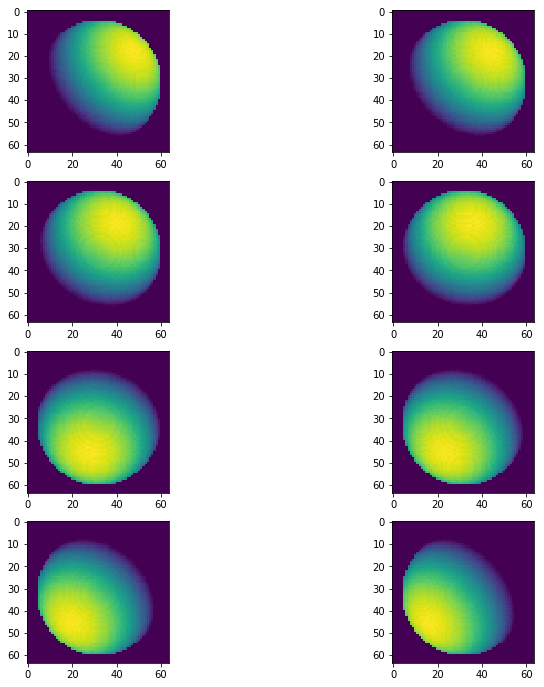

In [7]:
plt.figure(figsize=(12,12))
for i in range(len(source)):
    z[i][tmp>0] = (xx[tmp>0]*source[i,0] + yy[tmp>0]*source[i,1] + tmp[tmp>0])/(r*norm[i][0])
    z[i][z[i]<0] = 0
    plt.subplot(4,2,i+1)
    plt.imshow(z[i])
    #plt.colorbar()
plt.show()

In [8]:
tmp = np.asarray([-1,-1,1])
tmp = np.tile(tmp,(len(source),1))
S = source*tmp
norm = np.tile(norm,(1,3))
S = S/norm
print(S)

[[-0.8389 -0.7193  1.    ]
 [-0.5773 -0.6363  1.    ]
 [-0.3638 -0.5865  1.    ]
 [-0.1763 -0.5596  1.    ]
 [ 0.1763  0.5596  1.    ]
 [ 0.3638  0.5865  1.    ]
 [ 0.5773  0.6363  1.    ]
 [ 0.8389  0.7193  1.    ]]


# Finding p and q using psuedoinverse

In [9]:
p = np.zeros((z[1].shape))
q = np.zeros((z[1].shape))
rho = np.zeros((z[1].shape))
for x in np.arange(0,64,1):
    for y in np.arange(0,64,1):
        E = z[:,x,y]
        b = np.dot(np.linalg.pinv(S),E)
        if(b[2] != 0):
            p[x,y] = -1*b[0]/b[2]
            q[x,y] = -1*b[1]/b[2]
            rho[x,y] = b[2]*((1+p[x,y]**2+q[x,y]**2)**0.5 )

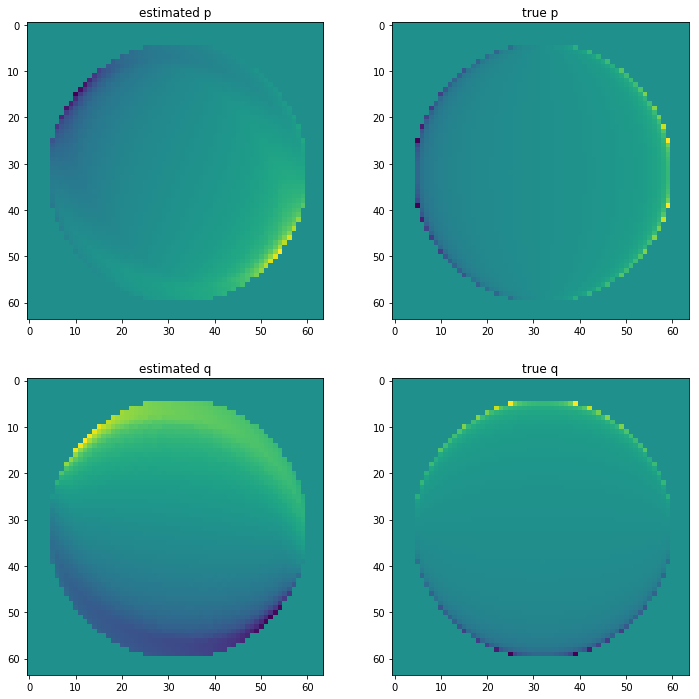

In [10]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("estimated p")
plt.imshow(p)
plt.subplot(2,2,2)
plt.title("true p")
plt.imshow(true_p)
plt.subplot(2,2,3)
plt.title("estimated q")
plt.imshow(q)
plt.subplot(2,2,4)
plt.title("true q")
plt.imshow(true_q)
plt.show()

In [21]:
max_true_p = np.amax(true_p)
maxp = np.amax(p)
max_true_q = np.amax(true_q)
maxq = np.amax(q)
print("max true p: %f, max p: %f, max true q: %f, max q: %f" %(max_true_p,maxp,max_true_q,maxq))

max true p: 11.022704, max p: 4.565071, max true q: 11.022704, max q: 3.869205


In [23]:
min_true_p = np.amin(true_p)
minp = np.amin(p)
min_true_q = np.amin(true_q)
minq = np.amin(q)
print("min true p: %f, min p: %f, min true q: %f, min q: %f" %(min_true_p,minp,min_true_q,minq))

min true p: -11.022704, min p: -4.565071, min true q: -11.022704, min q: -3.869205


In [15]:
#Difference
mse_p = np.mean(np.square(true_p-p))
mse_q = np.mean(np.square(true_q-q))
print("MSE in p: %f. MSE in q: %f" %(mse_p,mse_q))

MSE in p: 0.650845. MSE in q: 0.342423


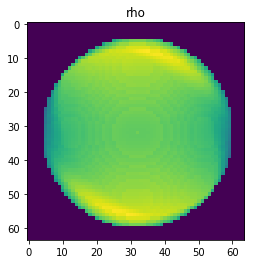

In [17]:
plt.imshow(rho)
plt.title("rho")
plt.show()

In [ ]:
##